C:\Users\Vanshika\AppData\Local\Temp\ipykernel_5592\3729849885.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["zeit_sort"] = pd.to_datetime(df["jahr"].astype(str) + "-Q" + df["quartal"].astype(str), errors='coerce')


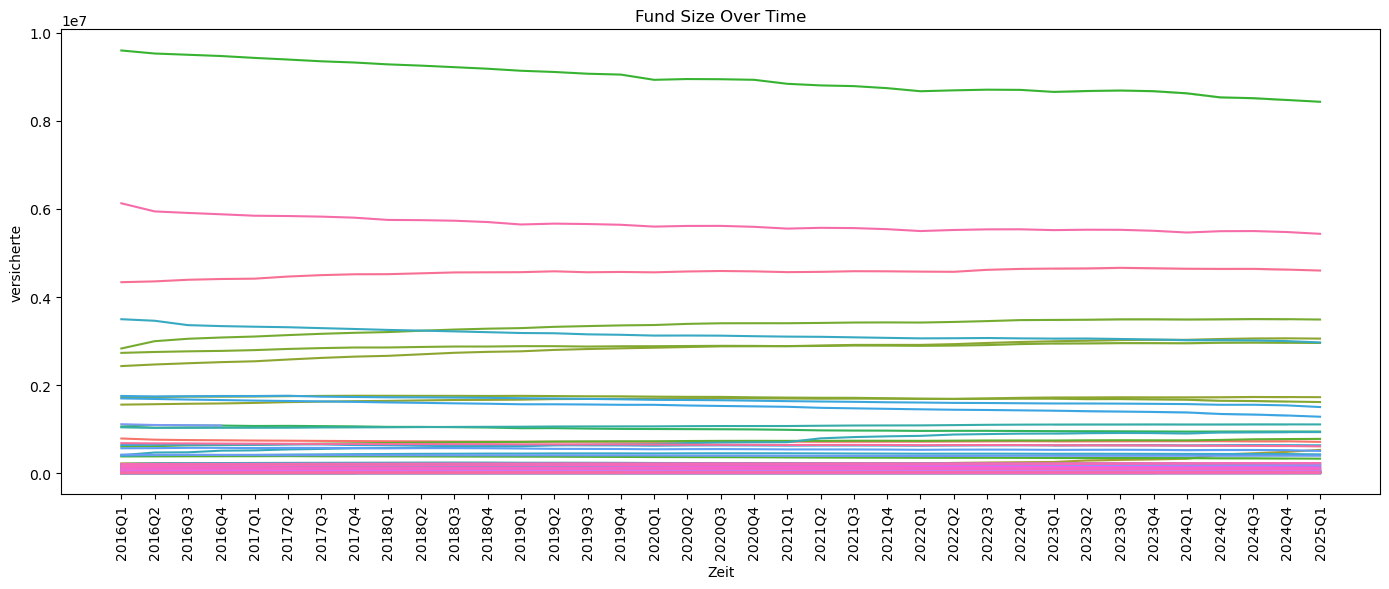

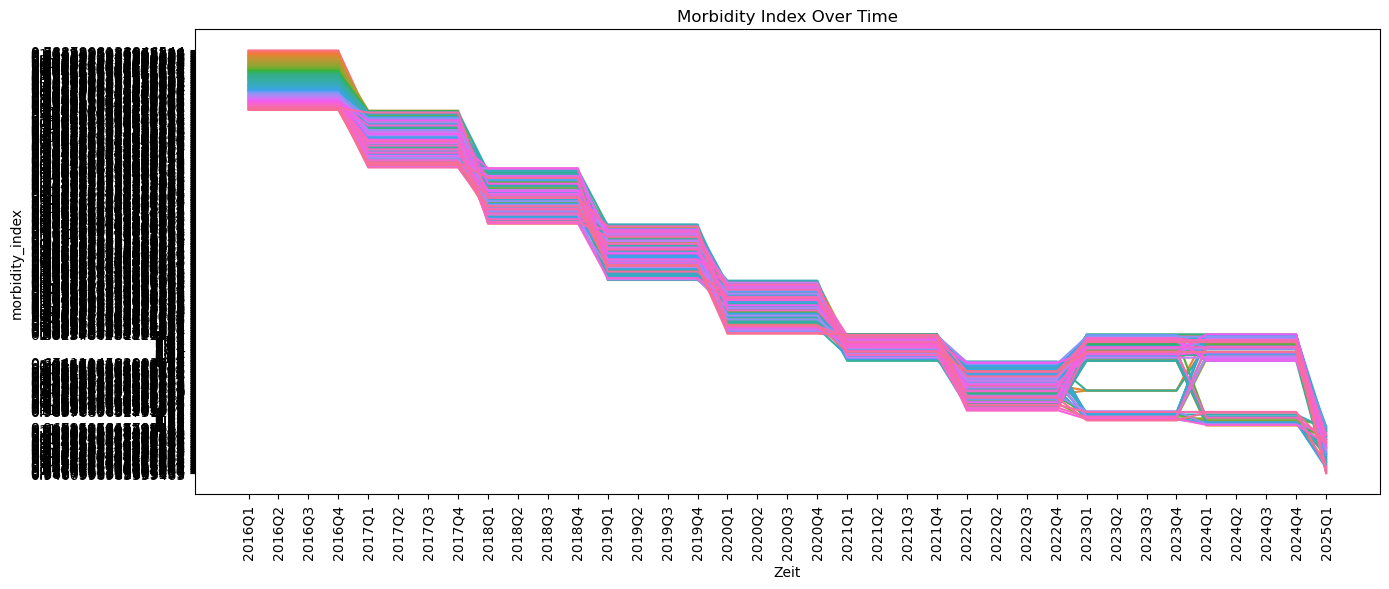

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load with clean types (handle DtypeWarning)
df = pd.read_csv("../../data/processed/merged_panel_clean_data.csv", low_memory=False)

# Drop rows with missing essential values
required_cols = ["jahr", "quartal", "versicherte", "morbidity_index", "kasse_clean"]
df = df.dropna(subset=required_cols)

# Convert jahr and quartal to integers
df["jahr"] = df["jahr"].astype(int)
df["quartal"] = df["quartal"].astype(int)

# Construct 'zeit' like '2020Q1'
df["zeit"] = df["jahr"].astype(str) + "Q" + df["quartal"].astype(str)

# Convert to string just in case
df["zeit"] = df["zeit"].astype(str)

# Ensure kasse_clean is string
df["kasse_clean"] = df["kasse_clean"].astype(str)

# Filter out rows where 'zeit' is not a proper string (eliminates any remaining float/invisible issues)
df = df[df["zeit"].apply(lambda x: isinstance(x, str))]

# Sort time using a datetime helper
df["zeit_sort"] = pd.to_datetime(df["jahr"].astype(str) + "-Q" + df["quartal"].astype(str), errors='coerce')
df = df.dropna(subset=["zeit_sort"])  # Remove failed datetime conversions
df = df.sort_values("zeit_sort")

def plot_fund_size_over_time():
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x="zeit", y="versicherte", hue="kasse_clean", legend=False)
    plt.title("Fund Size Over Time")
    plt.xticks(rotation=90)
    plt.xlabel("Zeit")
    plt.tight_layout()
    plt.show()

def plot_morbidity_over_time():
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x="zeit", y="morbidity_index", hue="kasse_clean", legend=False)
    plt.title("Morbidity Index Over Time")
    plt.xticks(rotation=90)
    plt.xlabel("Zeit")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_fund_size_over_time()
    plot_morbidity_over_time()
